<a href="https://colab.research.google.com/github/suyash456/30-Days-Challenge/blob/main/Dog_VS_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 205MB/s]
100% 1.06G/1.06G [00:11<00:00, 95.4MB/s]


In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dense , Conv2D , Flatten , Dropout , BatchNormalization

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [10]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [12]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.0700 - accuracy: 0.5975 - val_loss: 0.6027 - val_accuracy: 0.6668
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5296 - accuracy: 0.7336 - val_loss: 0.6123 - val_accuracy: 0.6914
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4504 - accuracy: 0.7909 - val_loss: 0.5352 - val_accuracy: 0.7344
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3897 - accuracy: 0.8324 - val_loss: 0.5277 - val_accuracy: 0.7654
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3142 - accuracy: 0.8638 - val_loss: 0.5467 - val_accuracy: 0.7696
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2390 - accuracy: 0.8992 - val_loss: 0.4905 - val_accuracy: 0.7928
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.1778 - accuracy: 0.9287 - val_loss: 0.6353 - val_ac

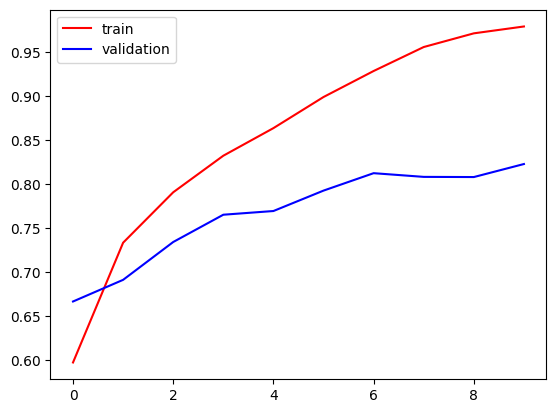

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue', label='validation')
plt.legend()
plt.show()


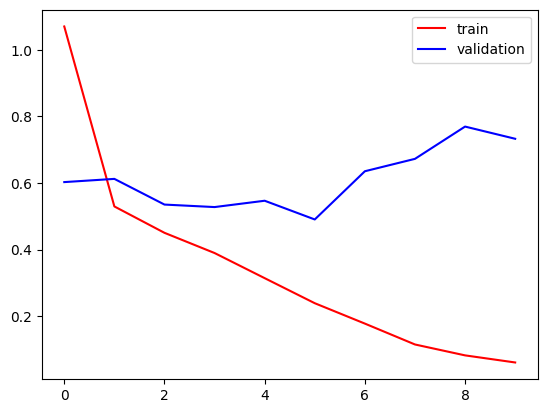

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue', label='validation')
plt.legend()
plt.show()

In [18]:
import cv2

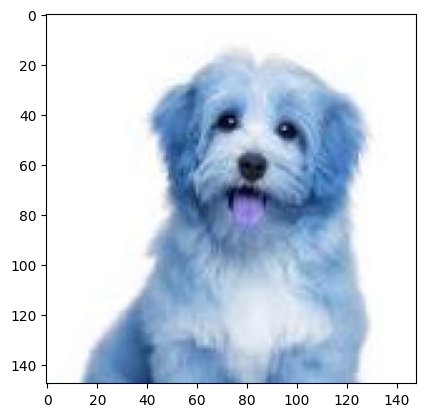

In [25]:
input_image = cv2.imread('/content/dog.jpg')
plt.imshow(input_image)

In [26]:
input_image.shape

(148, 148, 3)

In [27]:
input_image = cv2.resize(input_image, (256,256))

In [28]:
input_image = input_image.reshape((1,256,256,3))

In [29]:
model.predict(input_image)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)